In [1]:
# Q).we are running a website and we have five different banners for a single advertisement that is been showed on our website and say
# we want to figure out which advertisement banner is most liked by the user.


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Creating the Dataset
df = pd.DataFrame()
for i in range(5):
    df['Banner:'+str(i)] = np.random.randint(0,2,100000)

In [4]:
df.head

<bound method NDFrame.head of        Banner:0  Banner:1  Banner:2  Banner:3  Banner:4
0             1         1         0         1         0
1             1         1         0         0         1
2             1         1         1         0         1
3             1         1         0         1         1
4             0         1         0         0         0
...         ...       ...       ...       ...       ...
99995         1         0         0         1         1
99996         0         1         0         1         0
99997         0         0         1         0         0
99998         0         0         0         1         1
99999         0         0         0         0         0

[100000 rows x 5 columns]>

In [5]:
#Set no of interations:

num_interations=10000


In [6]:
num_banner=5

In [7]:
#Initialize count for storing the no of times,the banner was clicked:
count=np.zeros(num_banner)

In [8]:
#Initialize sum_rewards for storing the sum of rewards obtained was clicked:
sum_rewards=np.zeros(num_banner)

In [9]:
#Initialize Q for storing the mean reward of each banner:
Q=np.zeros(num_banner)

In [10]:
#Define the list for storing the selected banners:
banner_selected=[]

In [11]:
#Define the epsilion-greedy method
# We generate a random value from a uniform distribution.If the random value is less than epsilon,then we select the random banner else we select
# the best banner which has a maximum average reward.

In [12]:
def softmax(T):
  denom=sum([np.exp(i/T) for i in Q])
  probs=[np.exp(i/T)/denom for i in Q]

  arm=np.random.choice(num_banner,p=probs)
  return arm

In [13]:
T=50
for i in range(num_interations):
    banner = softmax(0.5)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    banner_selected.append(banner)
    T=T*0.99

In [14]:
#after all the rounds, we  can select the best banner as the one which has max avg reward
print('The optimal banner is {}'.format(np.argmax(Q)))

The optimal banner is 0


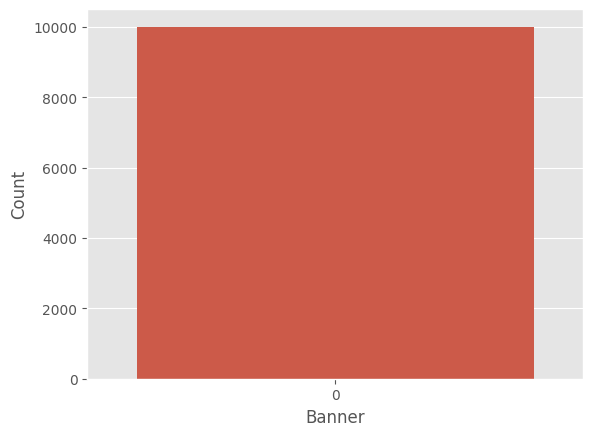

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

ax = sns.countplot(banner_selected)
ax.set(xlabel='Banner',ylabel='Count')
plt.show()

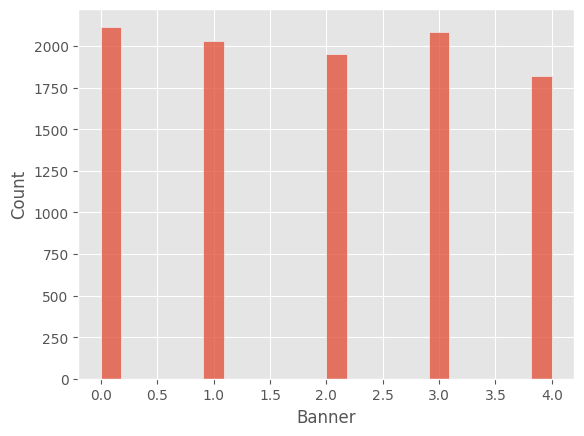

In [16]:
ax=sns.histplot(banner_selected)
ax.set(xlabel='Banner',ylabel='Count')
plt.show()